# IEE 520 Final Project

By Abhishek Deshpande (1213336811)

In [1]:
import pandas as pd
data = pd.read_csv('Traindata.csv')

In [2]:
X=data.iloc[:,0:68]
y=data.iloc[:,67]

In [3]:
X=X.drop('Row',axis=1)


In [4]:
X.shape

(2500, 67)

In [5]:
y.shape

(2500,)

In [6]:
testdata = pd.read_csv('Testdata.csv')
TestX = testdata.iloc[:,0:68]
TestX = TestX.drop('Row',axis=1)
TestX = TestX.drop('y',axis=1)


In [7]:
import numpy as np
X.fillna(np.mean(X), inplace = True)

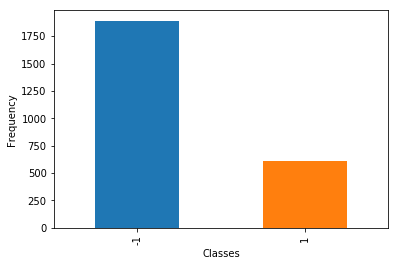

In [8]:
import matplotlib.pyplot as plt

ax=y.value_counts().plot(kind='bar')
ax.set_ylabel('Frequency')
ax.set_xlabel('Classes')
plt.show()

In [9]:
y.value_counts()

-1    1891
 1     609
Name: y, dtype: int64

In [11]:
Cat=list(X.select_dtypes(include=['object']))
print(Cat)

['x5', 'x13', 'x64', 'x65']


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
for i in Cat:
    LE = LabelEncoder()
    label = pd.DataFrame(X[i]).apply(LE.fit_transform)
    encoder = OneHotEncoder()
    encoder.fit(label)
    ohl = encoder.transform(label).toarray()
    X = X.join(pd.DataFrame(ohl),lsuffix='_left',rsuffix='_right')
    X = X.drop(i,axis=1)
    label_test = pd.DataFrame(TestX[i]).apply(LE.transform)
    ohl_test = encoder.transform(label_test).toarray()
    TestX = TestX.join(pd.DataFrame(ohl_test),lsuffix='_left',rsuffix='_right')
    TestX = TestX.drop(i,axis=1)

In [13]:
X.head()
X_new = X
y=X_new['y']

In [14]:
X_new.shape

(2500, 79)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=42)

In [16]:
X_train.y.value_counts()

-1    1516
 1     484
Name: y, dtype: int64

In [17]:
from sklearn.utils import resample
minclass = resample(X_train[X_train.y==1], replace = True, n_samples= 1032, random_state = 123)
X_train_new = pd.concat([X_train,minclass])

In [18]:
X_train_new.y.value_counts()

 1    1516
-1    1516
Name: y, dtype: int64

In [19]:
X_train_new.shape

(3032, 79)

In [20]:
y_train = X_train_new['y']
X_train_new=X_train_new.drop('y',axis=1)
X_train = X_train_new
X_test=X_test.drop('y',axis=1)

In [21]:
X_train.shape

(3032, 78)

In [22]:
X_test.shape

(500, 78)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit(X_train_new).transform(X_train_new)
X_test = scale.transform(X_test)
TestX = scale.transform(TestX)

In [24]:
X_train.shape

(3032, 78)

In [25]:
X_new=X_new.drop('y',axis=1)
X_new = scale.transform(X_new)

In [26]:
X_new.shape

(2500, 78)

## Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=123, max_depth=None)
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [50]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

yhat = DT.predict(X_test)
print ("Training Accuracy")
print (metrics.accuracy_score(y_test, yhat))
print (metrics.classification_report(y_test, yhat))
print (confusion_matrix(y_test, yhat))

Training Accuracy
0.798
             precision    recall  f1-score   support

         -1       0.85      0.89      0.87       375
          1       0.61      0.54      0.57       125

avg / total       0.79      0.80      0.79       500

[[332  43]
 [ 58  67]]


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
parameters = {'max_depth':[5,10,50,100],'min_samples_split':[2,3,5]}
cross = GridSearchCV(DT, parameters, cv=5)
cross.fit(X_train, y_train)
yhat = cross.predict(X_test)
print (" Accuracy")
print (metrics.accuracy_score(y_test, yhat))
print (metrics.classification_report(y_test, yhat))
print (confusion_matrix(y_test, yhat))

 Accuracy
0.798
             precision    recall  f1-score   support

         -1       0.85      0.89      0.87       375
          1       0.61      0.54      0.57       125

avg / total       0.79      0.80      0.79       500

[[332  43]
 [ 58  67]]


In [30]:
cross.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

## Random Forest

In [31]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
RF=RandomForestClassifier()

RF.fit(X_train,y_train)



yhat = RF.predict(X_test)
print ("Training Accuracy")
print (metrics.accuracy_score(y_test, yhat))
print (metrics.classification_report(y_test, yhat))
print (confusion_matrix(y_test, yhat))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Training Accuracy
0.8
             precision    recall  f1-score   support

         -1       0.84      0.91      0.87       375
          1       0.63      0.48      0.55       125

avg / total       0.79      0.80      0.79       500

[[340  35]
 [ 65  60]]


In [32]:
RF.get_params()#n_jobs = -1, max_features = 'sqrt', n_estimators = 250, oob_score = True, random_state = 123

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10,50,300,500],'max_features':['auto','sqrt','log2'],'oob_score':['False'],'n_jobs':[1]}
cross1 = GridSearchCV(RF, parameters, cv=5)
cross1.fit(X_train, y_train)
yhat = cross1.predict(X_test)
print (" Accuracy")
print (metrics.accuracy_score(y_test, yhat))
print (metrics.classification_report(y_test, yhat))
print (confusion_matrix(y_test, yhat))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means t

 Accuracy
0.836
             precision    recall  f1-score   support

         -1       0.87      0.92      0.89       375
          1       0.71      0.58      0.64       125

avg / total       0.83      0.84      0.83       500

[[345  30]
 [ 52  73]]


In [34]:
print(cross1.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score='False', random_state=None, verbose=0,
            warm_start=False)


In [35]:
#Selected Model
S_M= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score='False', random_state=None, verbose=0,
            warm_start=False)

S_M.fit(X_new,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score='False', random_state=None, verbose=0,
            warm_start=False)

In [36]:
yhat = S_M.predict(TestX)
yhat

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [44]:
import numpy as np
import pandas as pd
row_num = np.linspace(1,1647,1647)
test_y = pd.DataFrame(row_num)
test_y['yhat'] = yhat
test_y.to_csv('testRF.csv',header=None, index = False)

## Adaboost Classifier 

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix 
AB=AdaBoostClassifier(RF)
AB.fit(X_train,y_train)

yhat = AB.predict(X_test)
print ("Training Accuracy")
print (metrics.accuracy_score(y_test, yhat))
print (metrics.classification_report(y_test, yhat))
print (confusion_matrix(y_test, yhat))

Training Accuracy
0.804
             precision    recall  f1-score   support

         -1       0.81      0.97      0.88       375
          1       0.78      0.30      0.44       125

avg / total       0.80      0.80      0.77       500

[[364  11]
 [ 87  38]]


In [54]:
AB.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'base_estimator__bootstrap': True,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 10,
 'base_estimator__n_jobs': 1,
 'base_

In [57]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10,50,300],'learning_rate':[1]}
cross2 = GridSearchCV(AB, parameters, cv=5)
cross2.fit(X_train, y_train)
yhat = cross2.predict(X_test)
print (" Accuracy")
print (metrics.accuracy_score(y_test, yhat))
print (metrics.classification_report(y_test, yhat))
print (confusion_matrix(y_test, yhat))

 Accuracy
0.81
             precision    recall  f1-score   support

         -1       0.81      0.98      0.89       375
          1       0.81      0.31      0.45       125

avg / total       0.81      0.81      0.78       500

[[366   9]
 [ 86  39]]


In [58]:
print(cross2.best_estimator_)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1, n_estimators=300, random_state=None)


## SVM

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
SVM=SVC()
SVM.fit(X_train,y_train)

yhat = SVM.predict(X_test)
print ("Training Accuracy")
print (metrics.accuracy_score(y_test, yhat))
print (metrics.classification_report(y_test, yhat))
print (confusion_matrix(y_test, yhat))

Training Accuracy
0.722
             precision    recall  f1-score   support

         -1       0.95      0.67      0.78       375
          1       0.47      0.89      0.61       125

avg / total       0.83      0.72      0.74       500

[[250 125]
 [ 14 111]]


In [60]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[50,500,1000],'gamma':[0.001,0.01],'kernel':['rbf'],'class_weight':['balanced'],'probability':[True]}
cross3 = GridSearchCV(SVM, parameters, cv=5)
cross3.fit(X_train, y_train)
yhat = cross3.predict(X_test)
print (" Accuracy")
print (metrics.accuracy_score(y_test, yhat))
print (metrics.classification_report(y_test, yhat))
print (confusion_matrix(y_test, yhat))

 Accuracy
0.75
             precision    recall  f1-score   support

         -1       0.84      0.82      0.83       375
          1       0.50      0.54      0.52       125

avg / total       0.76      0.75      0.75       500

[[308  67]
 [ 58  67]]


In [61]:
print(cross3.best_estimator_)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
